In [11]:
import pandas as pd
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u

import matplotlib.pyplot as plot
import matplotlib
import astropy
from matplotlib import cm
import numpy as np
import math
from matplotlib.colors import Normalize

from matplotlib import colors 


#gaia = pd.read_hdf("gaiaspectra.hdf5") 

In [272]:
#just definining shit for l8r
z = gaia['z'] * 1000 #in pc
r = gaia['R'] * 1000 #in pc
V_r = gaia['vR']
V_phi = gaia['vphi']
V_z = gaia['vz']
L_z = gaia['Lz'] *1000 #in pc


In [273]:

#using the potential described in https://arxiv.org/pdf/1611.00222.pdf section 3.2, identical to that used in their
#recent Nature paper

#defining the constants in pc
a = 6.5 * 10 **(3)
b = .26 * 10 **(3)
c = 0.7 * 10 **(3)
d = 12 * 10 **(3)
#*10**-3 for g in pc
#potential for each portion of the galaxy, where r and z are from your data

#note that this bitch is in kpc
halo = (173.2)**2 * np.log(1 + (r**2 / d**2) + (z**2 / d**2))
disk = - (4.302 * 10**(-3) * 6.3 * 10**(10)) / (np.sqrt(r**2 + (a + np.sqrt(z**2 + b**2))**2))
bulge = - (4.302 * 10**(-3) * 2.1 * 10**(10))/ (np.sqrt(r**2 + z**2) + c)

KE = .5 * (V_r**2 +V_phi**2 + V_z**2)

gaia['E'] = (halo + disk + bulge + KE)


In [280]:
#getting reasonable area for sag debris, this is from https://arxiv.org/pdf/1804.09381.pdf where I have given myself
# +/- 10 degrees in dec, +/- 10 in RA, gives us 35342 rows, predominantly apogee & Raveon

data = gaia[gaia['dec'] < - 17]
data = data[data['dec'] > -45]
data = data[data['ra'] > 270]
data = data[data['ra'] < 298]

data = data.dropna()
#brings this down to 26514 rows

Text(0,0.5,'E')

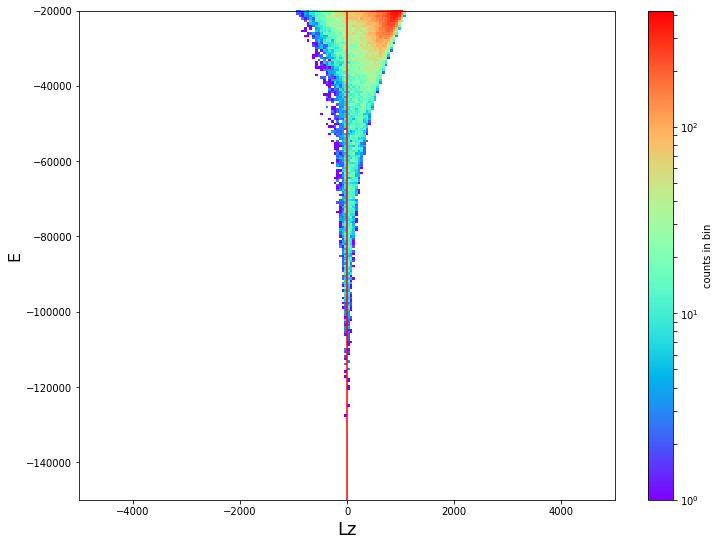

In [281]:
#this baby is all data from Jason

y= gaia['E']
#x=gaia['Lz']
x = gaia['R'] * gaia['vphi']
plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-5000, 5000),(-1.5*10**5, -2*10**4)),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
#plot.xlim(-1000, 1000)
#plot.ylim(-60, 60)
cb = plot.colorbar()
cb.set_label('counts in bin')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)


Text(0,0.5,'E')

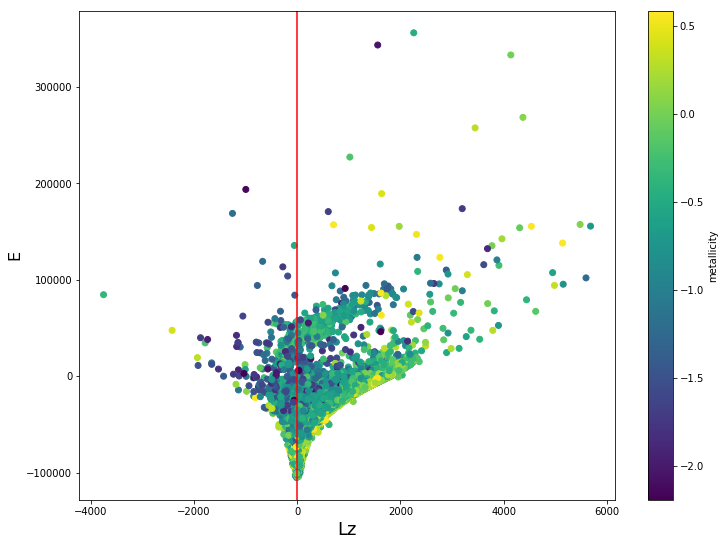

In [286]:
#this boi is just within our ~nominal sag range~, coloured by metallicity

#scaling some
y= data['E'] 
#x=gaia['vphi'] * gaia['R']# * 1000
x = data['Lz']
plot.figure(figsize=(12,9))
plot.scatter(x, y, c = data['Z'])
#plot.ylim(-1.5*10**5, -2*10**4)
#plot.xlim(-5000, 5000)
#plot.xlim(-4000, 4000)
#plot.ylim(0,2*10**5)
cb = plot.colorbar()
cb.set_label('metallicity')
plot.axvline(x=0.0, color='r', linestyle='-')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)




#basically above, coloured by density now
y=data['E']
x=data['Lz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)
plot.axvline(x=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

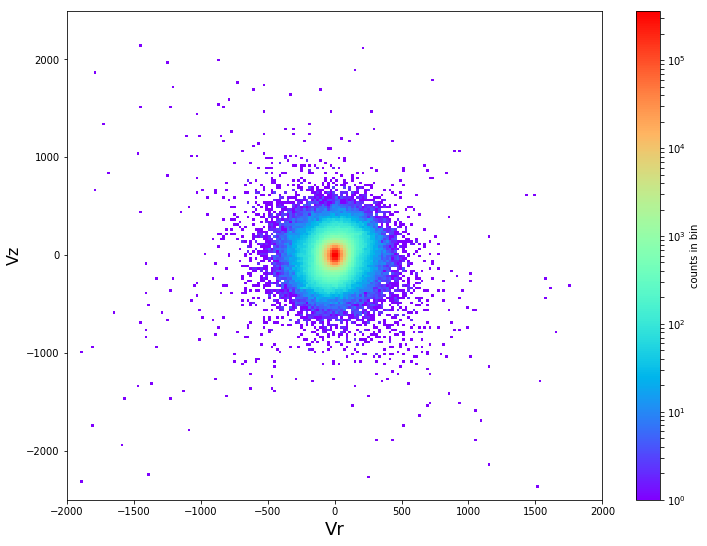

In [265]:
#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),range=((-2000, 2000), (-2500, 2500)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

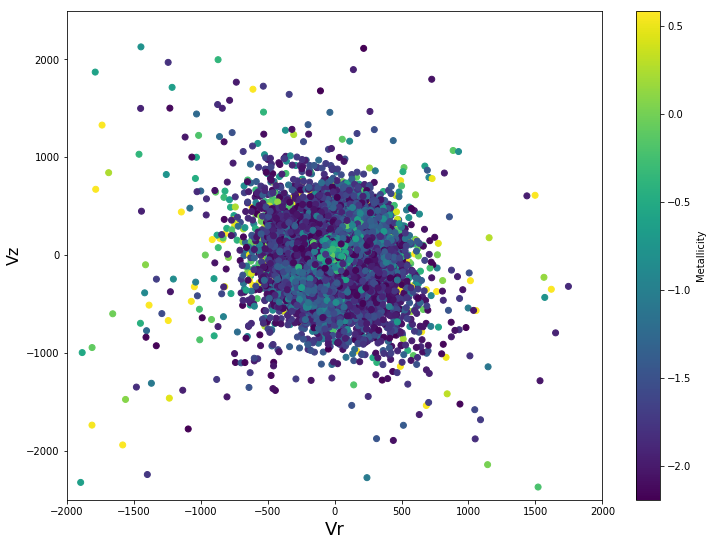

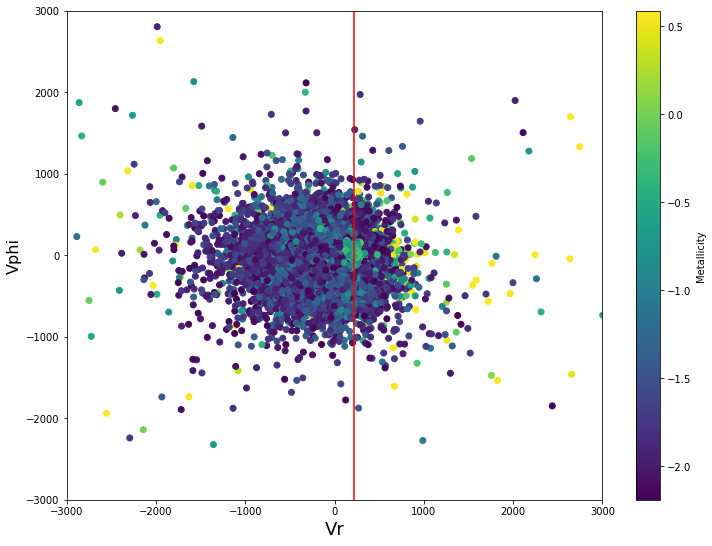

In [309]:
#this is full gaia rvs Vr Vz plot, metallicity coloured - disregarding some spatter
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=gaia['Z'])
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)

plot.xlim(-2000, 2000)
plot.ylim(-2500, 2500)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')


#this is full gaia rvs Vr Vphi plot, metallicity coloured - disregarding some spatter again, GSR on here
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=gaia['Z'])
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
plot.xlim(-3000, 3000)
plot.ylim(-3000, 3000)

#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')




#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter. Added in line for GSR
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-3000, 3000), (-3000, 3000)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

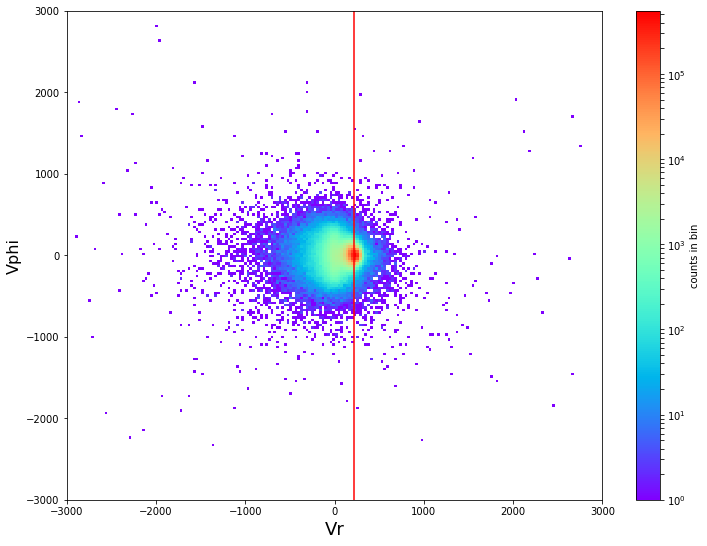

In [268]:
#this is full gaia rvs Vr Vz plot, again counts coloured - disregarding some spatter. Added in line for GSR
gaia = gaia.dropna()
y=gaia['vR']
x=gaia['vphi']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200), range=((-3000, 3000), (-3000, 3000)),
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vphi', fontsize=16)
plot.axvline(x=220.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')

In [306]:
#checkin out that sweet substructure
substruc = gaia[gaia['vR'] < 280]
substruc = substruc[substruc['vR'] > 90]
substruc = substruc[substruc['vz'] < 280]
substruc = substruc[substruc['vz'] > 160]
#substruc.sort_values(by='ra')

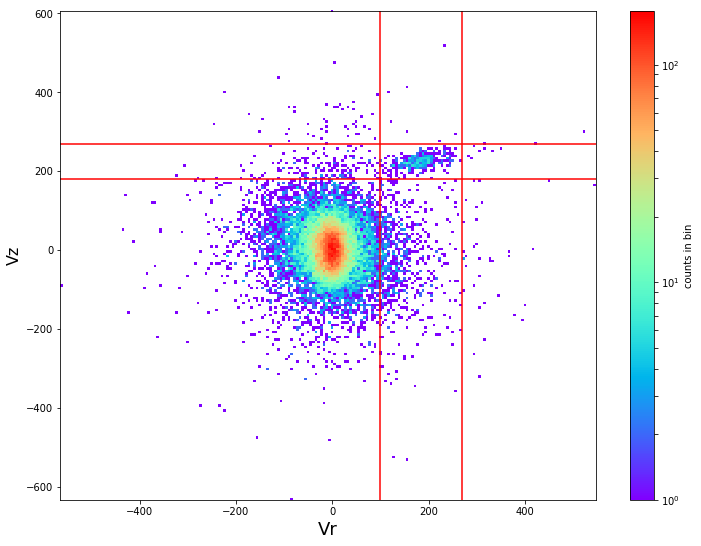

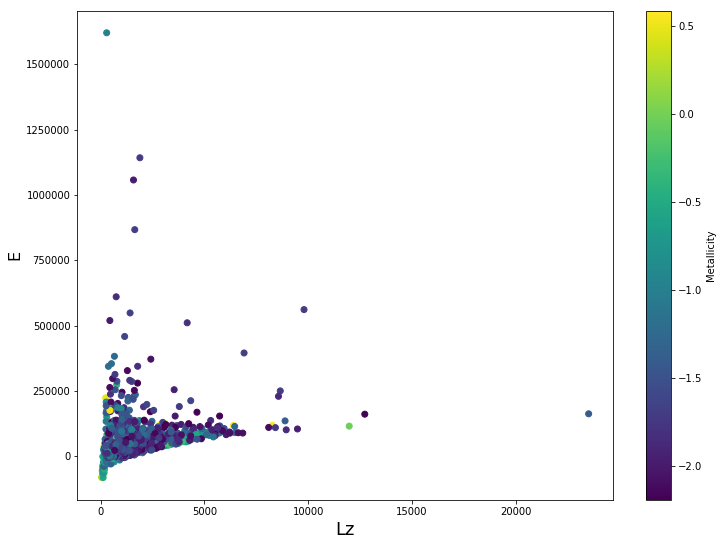

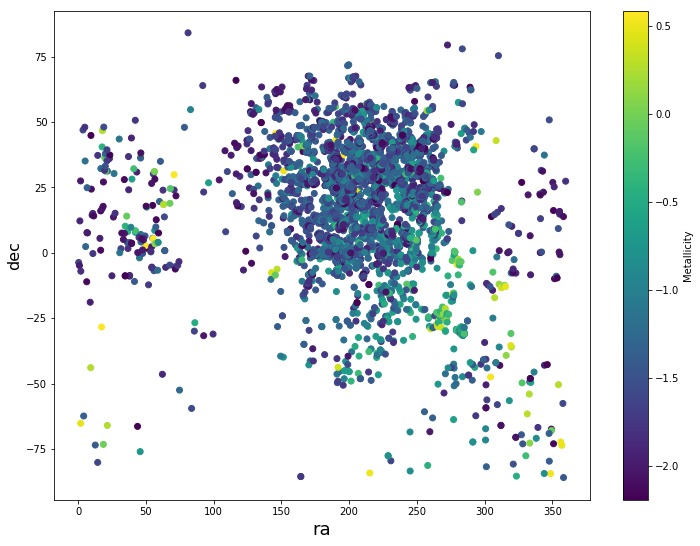

In [313]:
#sag range velocities in vz and vr, note weird substructure 

y=data['vR']
x=data['vz']

plot.figure(figsize=(12,9))
plot.hist2d(x, y, bins=(200,200),
            #weights = data['V_phi'],
            norm=colors.LogNorm(),
            normed = False,
            cmap='rainbow')
plot.xlabel('Vr', fontsize=18)
plot.ylabel('Vz', fontsize=16)
plot.axhline(y=180.0, color='r', linestyle='-')
plot.axhline(y=270.0, color='r', linestyle='-')
plot.axvline(x=270.0, color='r', linestyle='-')
plot.axvline(x=100.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('counts in bin')




#plotting that weird lil chunk in phase space, just to see whats up


y=substruc['E']
x=substruc['Jz']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('Lz', fontsize=18)
plot.ylabel('E', fontsize=16)


#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')







#plotting in physical space just to see
y=substruc['dec']
x=substruc['ra']

plot.figure(figsize=(12,9))
plot.scatter(x, y, c=substruc['Z'])
plot.xlabel('ra', fontsize=18)
plot.ylabel('dec', fontsize=16)


#plot.axhline(y=0.0, color='r', linestyle='-')
cb = plot.colorbar()
cb.set_label('Metallicity')